<img src="https://omdena.com/wp-content/uploads/2020/02/omden-logo.png"/>

# JOB SKILL RECOMMENDATION SYSTEM
## LAGOS, NIGERIA CHAPTER

## Importing useful libraries

In [1]:
#libraries for loading and wrangling the data
import pandas as pd
import numpy as np

#libraries for data preprocessing
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#libraries for visualization
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

#libraries for the recommender algorithms
# importing the cosine similarity algo
from sklearn.metrics.pairwise import cosine_similarity
# importing the nearest neieghbors algorithm
from sklearn.neighbors import NearestNeighbors

In [2]:
##load in the cleaned jobdataset
df = pd.read_csv('jobb_data.csv', index_col=0).reset_index(drop=True)

In [3]:
df.head()

,Title,Job Description,Compnay Name,Location,Degree Type,Skills
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ..."
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems..."
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,NaN,"financial reporting principles, MS Office, ACA..."
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems..."
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,NaN,"Outlook, Excel, Word, PowerPoint, Google Sprea..."


In [4]:
df.isna().sum()

Title              0
Job Description    0
Compnay Name       0
Location           0
Degree Type        2
Skills             0
dtype: int64

In [5]:
##Make a copy of the original dataset
df_copy=df.copy()

In [6]:
df_copy

,Title,Job Description,Compnay Name,Location,Degree Type,Skills
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ..."
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems..."
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,NaN,"financial reporting principles, MS Office, ACA..."
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems..."
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,NaN,"Outlook, Excel, Word, PowerPoint, Google Sprea..."
...,...,...,...,...,...,...
114,Graduate Management Trainee,never miss a job update again. company: locati...,Food Concepts PLC,Lagos,"ma, hnd, b.sc, mpa, ma, nce","MS Office, accounting,business management,"
115,Nutritionist,we are searching for an experienced and energe...,Leadwell Outsourcing,Bayelsa,"ma, msa, mpa, nce","Nutrition,Dietetics,Registered with Local Auth..."
116,Head Treasury Marketing,"our client, a reputable tech-based microfinanc...",Pivotage Consulting Ltd,Lagos,"ma, bachelor, ond, mba, mma, mpa, nce","MS Excel,accounting software packages,certifie..."
117,Utilities Maintenance Controller,company descriptionour dream is to bring peopl...,International Breweries PLC,Onitsha,"ma, hnd, b.sc, ond, mia, mpa, nce","Mechanical Engineering,Trade Test, Electrical,..."


In [7]:
##Fill all null values with empty strings
df_copy = df_copy.fillna(" ")

In [8]:
df_copy.head()

,Title,Job Description,Compnay Name,Location,Degree Type,Skills
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ..."
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems..."
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,,"financial reporting principles, MS Office, ACA..."
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems..."
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,,"Outlook, Excel, Word, PowerPoint, Google Sprea..."


In [9]:
df_copy.isnull().sum()

Title              0
Job Description    0
Compnay Name       0
Location           0
Degree Type        0
Skills             0
dtype: int64

In [10]:
df_copy

,Title,Job Description,Compnay Name,Location,Degree Type,Skills
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ..."
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems..."
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,,"financial reporting principles, MS Office, ACA..."
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems..."
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,,"Outlook, Excel, Word, PowerPoint, Google Sprea..."
...,...,...,...,...,...,...
114,Graduate Management Trainee,never miss a job update again. company: locati...,Food Concepts PLC,Lagos,"ma, hnd, b.sc, mpa, ma, nce","MS Office, accounting,business management,"
115,Nutritionist,we are searching for an experienced and energe...,Leadwell Outsourcing,Bayelsa,"ma, msa, mpa, nce","Nutrition,Dietetics,Registered with Local Auth..."
116,Head Treasury Marketing,"our client, a reputable tech-based microfinanc...",Pivotage Consulting Ltd,Lagos,"ma, bachelor, ond, mba, mma, mpa, nce","MS Excel,accounting software packages,certifie..."
117,Utilities Maintenance Controller,company descriptionour dream is to bring peopl...,International Breweries PLC,Onitsha,"ma, hnd, b.sc, ond, mia, mpa, nce","Mechanical Engineering,Trade Test, Electrical,..."


In [11]:
#Assigning the copy of the dataset as corpus 
corpus = df_copy

In [12]:
corpus

,Title,Job Description,Compnay Name,Location,Degree Type,Skills
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ..."
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems..."
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,,"financial reporting principles, MS Office, ACA..."
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems..."
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,,"Outlook, Excel, Word, PowerPoint, Google Sprea..."
...,...,...,...,...,...,...
114,Graduate Management Trainee,never miss a job update again. company: locati...,Food Concepts PLC,Lagos,"ma, hnd, b.sc, mpa, ma, nce","MS Office, accounting,business management,"
115,Nutritionist,we are searching for an experienced and energe...,Leadwell Outsourcing,Bayelsa,"ma, msa, mpa, nce","Nutrition,Dietetics,Registered with Local Auth..."
116,Head Treasury Marketing,"our client, a reputable tech-based microfinanc...",Pivotage Consulting Ltd,Lagos,"ma, bachelor, ond, mba, mma, mpa, nce","MS Excel,accounting software packages,certifie..."
117,Utilities Maintenance Controller,company descriptionour dream is to bring peopl...,International Breweries PLC,Onitsha,"ma, hnd, b.sc, ond, mia, mpa, nce","Mechanical Engineering,Trade Test, Electrical,..."


In [13]:
##Define a function to merge all rows together
def combine_corpus(row):
    return row['Title']+" "+row['Job Description']+" "+row['Compnay Name']+" "+row['Location']+" "+row['Degree Type']+" "+row['Skills']

In [14]:
df_copy["combined_corpus"] = df_copy.apply(combine_corpus,axis=1)

In [15]:
df_copy

,Title,Job Description,Compnay Name,Location,Degree Type,Skills,combined_corpus
0,Front Desk Officer,* oversee all secretarial duties at entrance d...,TD Global Resource,Lagos,"ma, hnd, bsc, ma, nce","manning the switchboard, receiving, endorsing ...",Front Desk Officer * oversee all secretarial d...
1,Customer Service Representative,the ideal candidate loves talking to people an...,IQ SYSTEMS SOLUTIONS LIMITED,Lagos,"ond, ma, msa, nce","General Managerial/Administration, CRM systems...",Customer Service Representative the ideal cand...
2,Accountant,•preparation of petty cash.• posting of petty ...,Health insurance company,Lagos,,"financial reporting principles, MS Office, ACA...",Accountant •preparation of petty cash.• postin...
3,Customer Service Representative,"summaryour client, (a reputable retail gas sto...",WorQulture,Lagos,"ma, bachelor, mea, ond, mma, mpa, n cre, nce","General Managerial/Administration, CRM systems...",Customer Service Representative summaryour cli...
4,Assistant,i need an assistant who is very proficient in ...,The Image Makers Company,Lagos,,"Outlook, Excel, Word, PowerPoint, Google Sprea...",Assistant i need an assistant who is very prof...
...,...,...,...,...,...,...,...
114,Graduate Management Trainee,never miss a job update again. company: locati...,Food Concepts PLC,Lagos,"ma, hnd, b.sc, mpa, ma, nce","MS Office, accounting,business management,",Graduate Management Trainee never miss a job u...
115,Nutritionist,we are searching for an experienced and energe...,Leadwell Outsourcing,Bayelsa,"ma, msa, mpa, nce","Nutrition,Dietetics,Registered with Local Auth...",Nutritionist we are searching for an experienc...
116,Head Treasury Marketing,"our client, a reputable tech-based microfinanc...",Pivotage Consulting Ltd,Lagos,"ma, bachelor, ond, mba, mma, mpa, nce","MS Excel,accounting software packages,certifie...","Head Treasury Marketing our client, a reputabl..."
117,Utilities Maintenance Controller,company descriptionour dream is to bring peopl...,International Breweries PLC,Onitsha,"ma, hnd, b.sc, ond, mia, mpa, nce","Mechanical Engineering,Trade Test, Electrical,...",Utilities Maintenance Controller company descr...


In [16]:
#Checking the fifth row in the combined corpus column
df_copy.iloc[4].combined_corpus

'Assistant i need an assistant who is very proficient in academic research and research writing. your responsibility will involve assisting me in carrying out my tasks. sending me previous academic writings you have done is an added advantage. The Image Makers Company Lagos   Outlook, Excel, Word, PowerPoint, Google Spreadsheets'

In [17]:
#adding more words perculiar to the dataset into the nltk stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
newStopWords = ['000','000availability','000depending','000interested','000location','000qualified','00pm',
                '021','05','0540','056','07','0705','07082206844','08','0910','098location','10','100','10488location','10489location','109location'
                '10th','11','1102','111location','1174','12','120','12th','145','14th','15','150','15th','16th','17','17th','18th','19','190','1967',
                '1968','1974','1990','1993','1999','1st','200','2000','2002','2003','2005','2007','2008','2009','2010','2011','2013','2016','2018',
                '2019','2020','2021','2022job','2022reporting','2023','2025','212','214','21what','22','23rd','24','25','25th','26th','27','286',
                '28th','29th','2categories','2for','2nd','30','300','3000','300k','30th','31','31st','35','370','3categories','3pmsalary','3rd',
                '40','400','4408022443156','445','45','465','47','48','4th','50','500','537393location','545838location','54gene','54geneconfidentiality',
                '5th','5years','5yrs','60','600','61','619','63','67','677','6pm','70','700','705','7overview','7th7work','808hiring','8th','8work','90',
                '908','9am','9promotion','9th','9work','aadeyemi','ab','abasi','109location','10th','7th','7work','80','8hiring'
               'área','zbb','yum','youemployee','abilitiesadaptabilitypersuasiveteam','abilitiescapable','abilitiescomputer',
                'abilitiesincumbent','abilitiesmust','abilitiesproficient','abilitiesstrong','8hiring','abilitiesability','abilitiesthorough','abilityaccuracy','área']

In [19]:
#Extending the list of stopwords by appending the manually developed stopwords
stopwords.extend(newStopWords)

In [20]:
vectorizer = TfidfVectorizer(stop_words = stopwords)

In [21]:
count_matrix = vectorizer.fit_transform(df_copy["combined_corpus"])

In [22]:
count_matrix

<119x5047 sparse matrix of type '<class 'numpy.float64'>'
	with 17707 stored elements in Compressed Sparse Row format>

In [23]:
arr = count_matrix.toarray()

In [24]:
arr

array([[0.        , 0.        , 0.07763112, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03477903, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01912776, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.142547  , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
vectorizer.get_feature_names()

['abide',
 'abilities',
 'ability',
 'able',
 'abound',
 'abreast',
 'abroad',
 'absent',
 'absenteeism',
 'abuja',
 'abujacontract',
 'abujadeadline',
 'abujahiring',
 'abujainternal',
 'abujapromotion',
 'abujaseries',
 'abuseenforce',
 'aca',
 'academia',
 'academic',
 'academies',
 'acca',
 'accelerate',
 'accelerating',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessengie',
 'accommodation',
 'accommodations',
 'accomplishing',
 'accor',
 'accordance',
 'according',
 'accordingly',
 'accorhotels',
 'account',
 'accountabilitiesinterpret',
 'accountability',
 'accountable',
 'accountablewe',
 'accountant',
 'accountantlocation',
 'accounted',
 'accounting',
 'accountingpost',
 'accountingrequirementseducation',
 'accounts',
 'accountsdevelop',
 'accountsto',
 'accredited',
 'accuracy',
 'accurate',
 'accuratecollect',
 'accurately',
 'accuratenumerical',
 'achieve',
 'achievement',
 'achievements',
 'achieveself',
 'achieving',
 'acknowledge',
 'acknowledg

In [26]:
text_columns = vectorizer.get_feature_names()

In [27]:
text_columns

['abide',
 'abilities',
 'ability',
 'able',
 'abound',
 'abreast',
 'abroad',
 'absent',
 'absenteeism',
 'abuja',
 'abujacontract',
 'abujadeadline',
 'abujahiring',
 'abujainternal',
 'abujapromotion',
 'abujaseries',
 'abuseenforce',
 'aca',
 'academia',
 'academic',
 'academies',
 'acca',
 'accelerate',
 'accelerating',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessengie',
 'accommodation',
 'accommodations',
 'accomplishing',
 'accor',
 'accordance',
 'according',
 'accordingly',
 'accorhotels',
 'account',
 'accountabilitiesinterpret',
 'accountability',
 'accountable',
 'accountablewe',
 'accountant',
 'accountantlocation',
 'accounted',
 'accounting',
 'accountingpost',
 'accountingrequirementseducation',
 'accounts',
 'accountsdevelop',
 'accountsto',
 'accredited',
 'accuracy',
 'accurate',
 'accuratecollect',
 'accurately',
 'accuratenumerical',
 'achieve',
 'achievement',
 'achievements',
 'achieveself',
 'achieving',
 'acknowledge',
 'acknowledg

In [28]:
len(text_columns)

5047

In [29]:
Array_DataFrame = pd.DataFrame(arr, columns = text_columns)

In [30]:
Array_DataFrame

,abide,abilities,ability,able,abound,abreast,abroad,absent,absenteeism,abuja,...,years,yield,yields,yoruba,young,youngsters,youth,zambia,zenith,zonal
0,0.0,0.000000,0.077631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.031157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.034779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.000000,0.019128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud

In [31]:
#reset the size of the images

plt.rcParams["figure.figsize"] = (20, 15)

In [32]:
# words not needed in the word cloud visuals

irrelevant_words = ['skill', 'skills', 'jobs', 'job', 'exeprience']
def remove_word(text):
    text = text.lower()
    remove = '|'.join(irrelevant_words)
    regex = re.compile(r'\b('+remove+r')\b')
    out = regex.sub(" ", text)
    out = out.title()
    return out

## Analysis based on location of job postings

In [33]:
text = " ".join(Location for Location in df_copy["Location"])
text[:50]

'Lagos Lagos Lagos Lagos Lagos Kogi Lagos Lagos Lag'

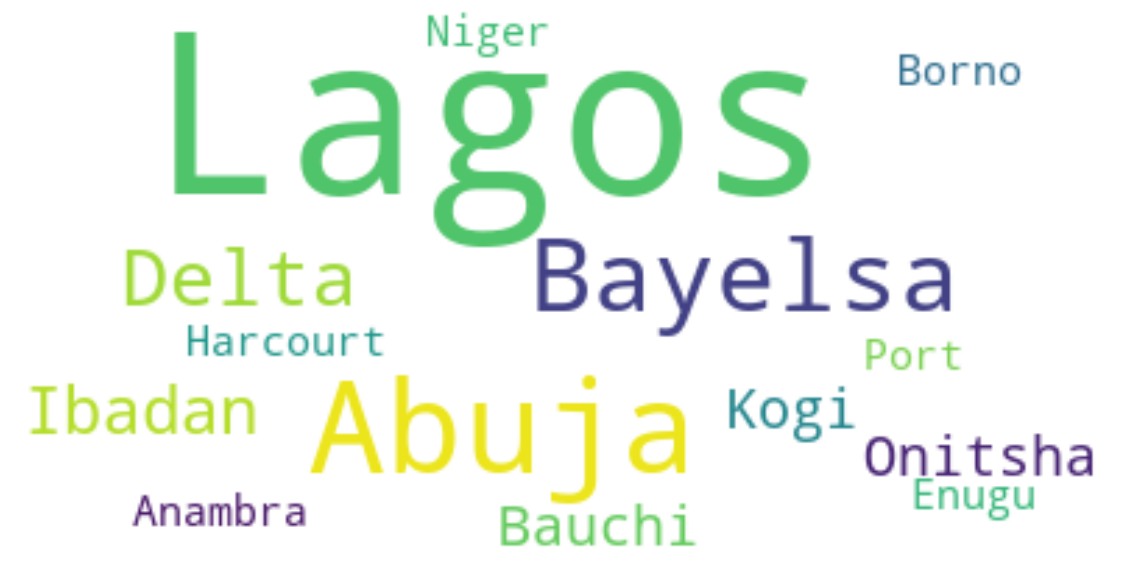

In [34]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analysis based on skills of the job postings

In [35]:
text2 = " ".join(Skills.lower() for Skills in df_copy["Skills"])
text2 = remove_word(text2)
text2[:50]

'Manning The Switchboard, Receiving, Endorsing Lett'

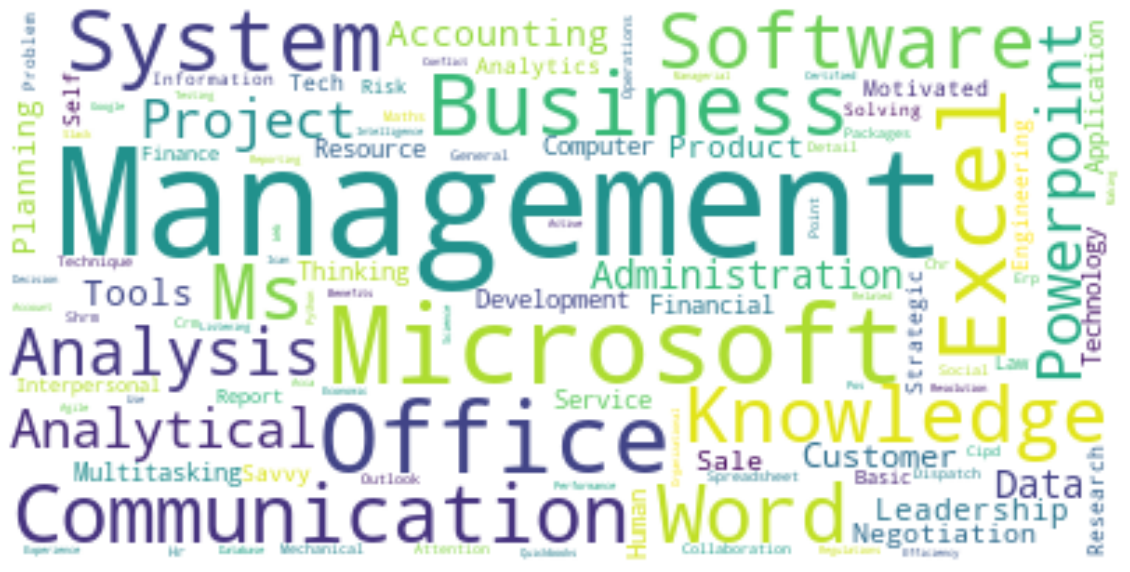

In [36]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analysis based on Job description of postings

In [37]:
text3 = " ".join(Job_Description for Job_Description in df_copy["Job Description"])
text3 = remove_word(text3)
text3[:50]

'* Oversee All Secretarial Duties At Entrance Desk*'

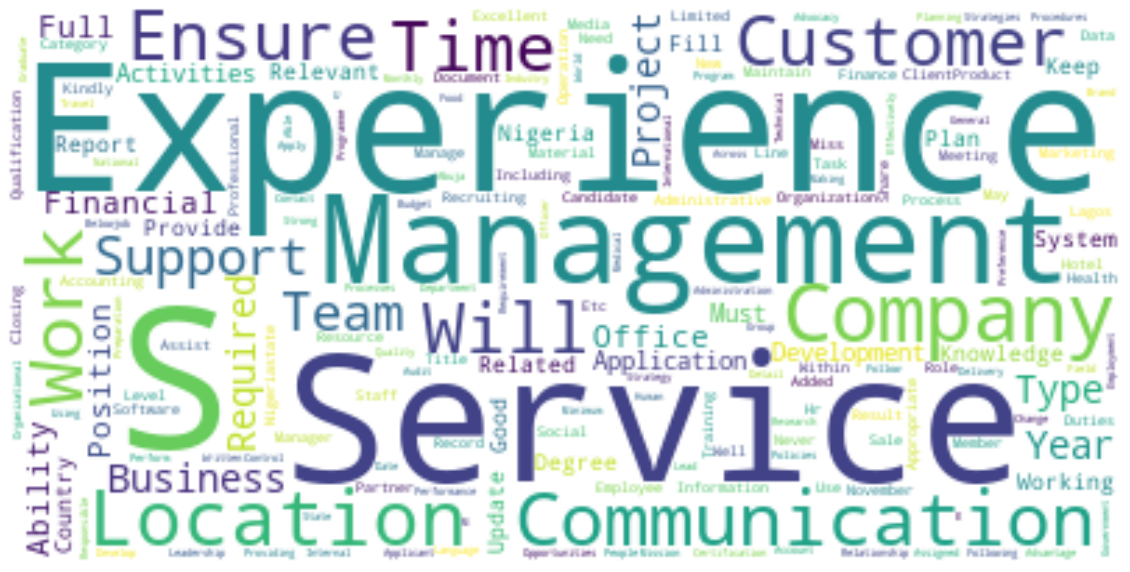

In [38]:
word_cloud3 = WordCloud(collocations = False, background_color = 'white').generate(text3)
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analysis basd on the Degree type required for the job posting

In [39]:
text4 = " ".join(Degree_Type for Degree_Type in df_copy["Degree Type"])
text4 = remove_word(text4)
text4[:50]

'Ma, Hnd, Bsc, Ma, Nce Ond, Ma, Msa, Nce   Ma, Bach'

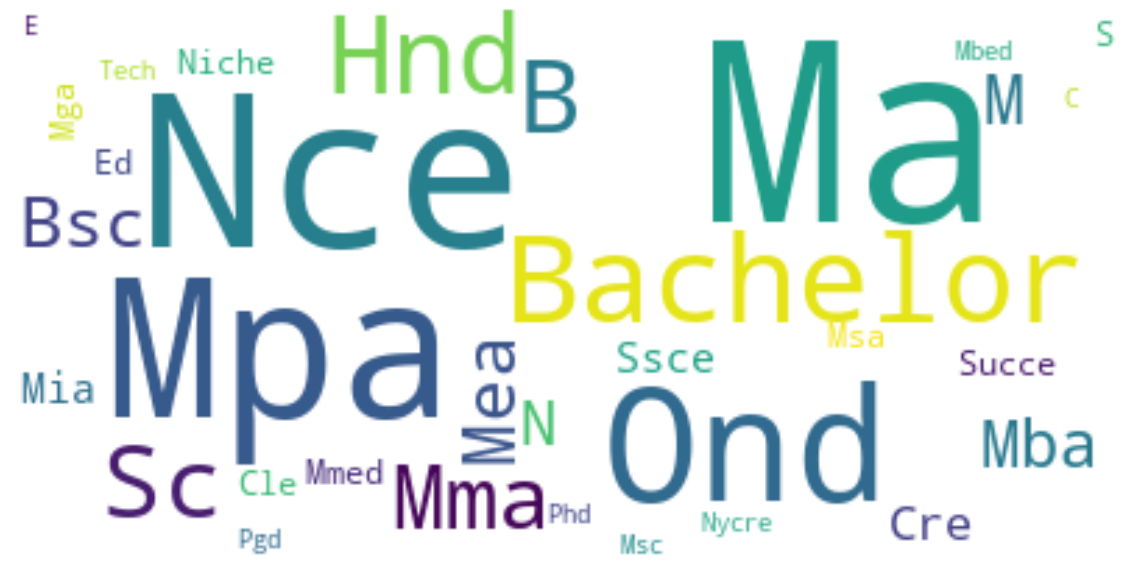

In [40]:
word_cloud4 = WordCloud(collocations = False, background_color = 'white').generate(text4)
plt.imshow(word_cloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

# Algorithms build up

### loading the resume data

In [41]:
resume_data = pd.read_csv('resume.csv')
resume_data.head()

,Gender,Text,Job Title,Category
0,Male,"Graduate Chemical Engineer\n 41, Mutairu Onigb...",Graduate Chemical Engineer,Engineering
1,Male,National ID: 45201043S45\n Languages: Shona/En...,Gardener,General
2,Male,"Kanyinsola\n Somolu, Lagos.\n 07088548390\n ra...",Software Programmer,IT
3,Female,Artificial Intelligence Engineer\n Lagos\n ade...,Artificial Intelligence Engineer,IT
4,Male,"Areas of Expertise- Internal Controls Reviews,...",Accountant,Finance


### preprocess data with bag of words model

In [42]:
cv_data = vectorizer.transform(resume_data['Text']).toarray()
cv_data = pd.DataFrame(cv_data, columns=text_columns)
cv_data.head()

,abide,abilities,ability,able,abound,abreast,abroad,absent,absenteeism,abuja,...,years,yield,yields,yoruba,young,youngsters,youth,zambia,zenith,zonal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039407,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.047314,0.0,0.0,0.0,0.015427,0.0,0.015427,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


## Nearest Neighbors algorithm

In [44]:
# getting the first person from the processed cv dataset
test = cv_data.loc[[0],:]
test

,abide,abilities,ability,able,abound,abreast,abroad,absent,absenteeism,abuja,...,years,yield,yields,yoruba,young,youngsters,youth,zambia,zenith,zonal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
resume_data.iloc[test.index[0]]

Gender                                                    Male
Text         Graduate Chemical Engineer\n 41, Mutairu Onigb...
Job Title                           Graduate Chemical Engineer
Category                                           Engineering
Name: 0, dtype: object

In [46]:
# function to carry out the nearest neighbors algorithm
# and return a dataframe showing the distance calculated and their respective index from the data.

def n_neighbors(data, test, k):
    nbrs =  NearestNeighbors(n_neighbors=k).fit(Array_DataFrame)
    distance, indicies = nbrs.kneighbors(test, return_distance=True)
    result_df = pd.DataFrame(distance[0], index=indicies[0], columns=['distance'])
    return result_df

In [47]:
trial = n_neighbors(Array_DataFrame, test, len(df))
trial

,distance
10,1.297442
47,1.318199
18,1.325116
54,1.326283
62,1.326748
...,...
27,1.402772
2,1.403304
95,1.403954
56,1.404803


In [48]:
for index in trial.index[:5]:
    print(df.loc[index,:])
    print('')

Title                                              Program Associate
Job Description    the organizationcentre for health ethics law a...
Compnay Name            Centre For Health Ethics Law and Development
Location                                                       Lagos
Degree Type                                        ma, ma, b.sc, nce
Skills             administrative work, accounting/finance, econo...
Name: 10, dtype: object

Title                             Graduate Energy Accounting Officer
Job Description    never miss a job update again. company: locati...
Compnay Name                                          Ikeja Electric
Location                                                       Lagos
Degree Type                                             mpa, ma, nce
Skills             Analytical Skill, Health and Safety skills, Bu...
Name: 47, dtype: object

Title                                            Project Coordinator
Job Description    never miss a job update again. com

## Cosine similarity algorithm

In [50]:
# getting the first person from the processed cv dataset
test = cv_data.loc[[0],:]
test

,abide,abilities,ability,able,abound,abreast,abroad,absent,absenteeism,abuja,...,years,yield,yields,yoruba,young,youngsters,youth,zambia,zenith,zonal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# function to carry out the cosine similarity algorithm
# and return a dataframe showing the cosine similarity calculated and their respective index from the data.

def cosine(data, test):
    result = cosine_similarity(data, test)
    result_df = pd.DataFrame(result, columns=['distance'])
    result_df.sort_values('distance', ascending=False, inplace=True)
    return result_df

In [52]:
trial2 = cosine(Array_DataFrame, test)
trial2

,distance
10,0.158322
47,0.131176
18,0.122034
54,0.120487
62,0.119870
...,...
27,0.016115
2,0.015370
95,0.014456
56,0.013265


In [53]:
for index in trial2.index[:5]:
    print(df.loc[index,:])
    print('')

Title                                              Program Associate
Job Description    the organizationcentre for health ethics law a...
Compnay Name            Centre For Health Ethics Law and Development
Location                                                       Lagos
Degree Type                                        ma, ma, b.sc, nce
Skills             administrative work, accounting/finance, econo...
Name: 10, dtype: object

Title                             Graduate Energy Accounting Officer
Job Description    never miss a job update again. company: locati...
Compnay Name                                          Ikeja Electric
Location                                                       Lagos
Degree Type                                             mpa, ma, nce
Skills             Analytical Skill, Health and Safety skills, Bu...
Name: 47, dtype: object

Title                                            Project Coordinator
Job Description    never miss a job update again. com